<div style="display: flex; justify-content: center; align-items: center; height: 100vh;">
    <img src="https://curso.infnet.com.br/c/wp-content/uploads/sites/5/2022/12/Infnet-Logo.png" height="300" width="300">
</div>

<p><b><font size = 5 face = 'verdana'> Algoritmos de Intelig√™ncia Artificial para classifica√ß√£o [25E1_2] - PROJETO FINAL</font></b></p>
<p><font size = 3 face = 'verdana'>Trabalho apresentado √† conclus√£o do curso de Algoritmos de Intelig√™ncia Artificial para classifica√ß√£o [25E1_2] do MIT em Intelig√™ncia Artificial, Machine Learning e Deep Learning, Instituto INFNET, como requisito parcial de avalia√ß√£o. </font></b></p>
<p><font size = 3 face = 'verdana'><b>PROFESSOR:</b> √çcaro Augusto Maccari Zelioli<br>
<b>ALUNO:</b> Osemar da Silva Xavier<br>
<b>E-MAIL:</b> osemar.xavier@al.infnet.edu.br<br>
<hr>
<b>GITHUB (pdf):<br></b><a href="https://github.com/oserxavier/Algoritmos_de_Inteligencia_Artificial_para_Classificacao/blob/main/AIA_Classif_25E1_2_Osemar_Xavier_v1.pdf">https://github.com/oserxavier/Algoritmos_de_Inteligencia_Artificial_para_Classificacao/blob/main/AIA_Classif_25E1_2_Osemar_Xavier_v1.pdf</a>
<hr>
<b>GITHUB (ipynb):<br></b><a href="https://github.com/oserxavier/Algoritmos_de_Inteligencia_Artificial_para_Classificacao/blob/main/AIA_Classif_25E1_2_Osemar_Xavier_v1.pdf">https://github.com/oserxavier/Algoritmos_de_Inteligencia_Artificial_para_Classificacao/blob/main/AIA_Classif_25E1_2_Osemar_Xavier_v1.ipynb</a>
<hr>
</font></p>

<p><font size = 3 face = 'verdana'>
<hr></hr>


# **Projeto de Machine Learning - Classifica√ß√£o de Vinhos**

## **Introdu√ß√£o**

Nesta disciplina, aplicamos nossos conhecimentos em **algoritmos supervisionados**, uma das principais abordagens do **aprendizado de m√°quina** utilizada no dia a dia de um cientista de dados.

## **Objetivo**
- Realizar a **classifica√ß√£o de vinhos verdes portugueses** utilizando diferentes modelos de **Machine Learning**.
- Comparar a **efici√™ncia dos modelos** e selecionar o mais adequado.
- Aplicar o modelo **escolhido** para prever a qualidade dos vinhos tintos.





---

## **Etapa 1 - M√≥dulo Kaggle**

1. Antes de iniciar o trabalho, √© necess√°rio completar o curso **"Intro to Machine Learning"** do Kaggle.  
2. A conclus√£o deve ser comprovada com um **print contendo a data e identifica√ß√£o do aluno**.

Link do certificado: [Kaggle - Intro to Machine Learning](https://www.kaggle.com/learn/certification/oserxavier/intro-to-machine-learning)

<div style="display: flex; justify-content: center; align-items: center; height: 100vh;">
    <img src="https://raw.githubusercontent.com/oserxavier/Machine-Learning/refs/heads/main/figures/kaggle.png" height="550" width="1400">
</div>

---
## **Etapa 2 - Base de Dados**

### **Download da Base**
Utilizaremos a **base de dados de vinhos verdes portugueses** dispon√≠vel no Kaggle e mencionada no artigo:

> P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.  
> *Modeling wine preferences by data mining from physicochemical properties.*  
> In **Decision Support Systems, Elsevier, 47(4):547-553, 2009**.

Link do conjunto de dados: [Wine Quality Dataset - Kaggle](https://www.kaggle.com/datasets/ruthgn/wine-quality-data-set-red-white-wine)

### **Transforma√ß√£o dos Dados**
A base cont√©m a vari√°vel `quality` com notas de **0 a 10** representando a qualidade do vinho.  
Criamos uma **nova vari√°vel categ√≥rica `opinion`**, definida como:

- `opinion = 0` ‚Üí quando `quality ‚â§ 5` (vinho ruim)
- `opinion = 1` ‚Üí quando `quality > 5` (vinho bom)

Ap√≥s essa transforma√ß√£o, a vari√°vel `quality` ser√° **removida** da an√°lise.

---

Fiz a instala√ß√£o do `opendatasets` que √© uma biblioteca Python que facilita o download de datasets p√∫blicos de plataformas como Kaggle, sem a necessidade de baixar manualmente pelo navegador.
<hr>

In [1]:
# Instalando a API do Kaggle para baixar o dataset
!pip install opendatasets

In [2]:
import opendatasets as od
import os
import pandas as pd

# Baixar os dados do Kaggle (certifique-se de ter um API Key do Kaggle configurado)
dataset_url = "https://www.kaggle.com/datasets/ruthgn/wine-quality-data-set-red-white-wine"
od.download(dataset_url)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: oserxavier
Your Kaggle Key: ¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑
Dataset URL: https://www.kaggle.com/datasets/ruthgn/wine-quality-data-set-red-white-wine


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 98.0k/98.0k [00:00<00:00, 43.0MB/s]

In [3]:
# Definir o caminho correto do arquivo (ajustado para o nome real)
wine_path = "wine-quality-data-set-red-white-wine/wine-quality-white-and-red.csv"

# Carregar os dados completos (tintos e brancos)
df_wine = pd.read_csv(wine_path, sep=",")

# Verificar se h√° uma coluna chamada 'type' para distinguir os vinhos
if "type" in df_wine.columns:
    # Filtrar apenas os vinhos brancos
    df_white = df_wine[df_wine["type"] == "white"].copy()

    # Criar a vari√°vel 'opinion'
    df_white["opinion"] = (df_white["quality"] > 5).astype(int)

    # Remover a vari√°vel 'quality'
    df_white.drop(columns=["quality"], inplace=True)

    # Exibir as 5 primeiras linhas para confirma√ß√£o
    print("\n Dados dos vinhos brancos filtrados com sucesso!")
    df_white.head()
else:
    print("A coluna 'type' n√£o foi encontrada! Verifique a estrutura do dataset.")



 Dados dos vinhos brancos filtrados com sucesso!


In [4]:
# Verificando as 5 primeiras linhas do dataset
df_white.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  opinion  
0       0.45      8.8        1  
1       0.49      9.5        1  
2       0.44     10.1        1  
3       0.40      9.9        1  
4       0.40      9.9        1

---
## **Etapa 3 - An√°lise das Vari√°veis**

- **Listar as vari√°veis** presentes na base.
- **Classificar as vari√°veis** em **discretas, categ√≥ricas ou cont√≠nuas**.
- **Calcular estat√≠sticas descritivas**, como **m√©dia e desvio padr√£o**.

---

In [5]:
# Exibir todas as colunas da base de dados
print("Vari√°veis presentes na base de vinhos brancos:")
print(df_white.columns.tolist())

Vari√°veis presentes na base de vinhos brancos:
['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'opinion']


In [6]:
# Verificar os tipos de dados de cada vari√°vel
print("Tipos de vari√°veis na base:\n ")
print(df_white.dtypes)

Tipos de vari√°veis na base:
 
type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
opinion                   int64
dtype: object


In [7]:
# Calcular m√©dia e desvio padr√£o de todas as vari√°veis num√©ricas
stats = df_white.describe().T[['mean', 'std']]

# Exibir os resultados utilizando display do pandas
display(stats.style.set_caption("Estat√≠sticas Descritivas")) # Using pandas styling for caption

---
## **Valores ausentes**

- Antes da pr√≥xima etapa, considerei **`contar quantos valores ausentes (NaN)`** existem em cada coluna, para esse dataset n√£o temos registros de valores ausentes. Como n√£o temos, n√£o ser√° necess√°rio utilizar uma estrat√©gia para tratamento
---

In [8]:
# Contar valores ausentes em cada coluna
missing_values = df_white.isnull().sum()
print(missing_values)

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
opinion                 0
dtype: int64


---
## **Etapa 4 - Modelagem Preditiva**

Utilizaremos **apenas os vinhos brancos** para o treinamento dos modelos.

### **4.1 - Constru√ß√£o do Modelo**
Passos para criar um **modelo de classifica√ß√£o eficiente**:
1. **Pr√©-processamento dos dados** (padroniza√ß√£o, limpeza, separa√ß√£o entre treino/teste).
2. **Escolha dos modelos de Machine Learning** para experimenta√ß√£o.
3. **Valida√ß√£o cruzada estratificada (k-fold = 10)** para avaliar a generaliza√ß√£o.
4. **Treinamento e ajuste dos hiperpar√¢metros** para otimiza√ß√£o.
5. **Avalia√ß√£o com m√©tricas padronizadas**.
---

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Remover a coluna categ√≥rica 'type' antes da modelagem
X = df_white.drop(columns=["opinion", "type"])  # Removendo 'type'
y = df_white["opinion"]

# Dividir os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Padronizar os dados (somente vari√°veis num√©ricas)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Dados corrigidos e preparados para modelagem!")


Dados corrigidos e preparados para modelagem!


---
## **Fun√ß√£o para Avalia√ß√£o dos Modelos**

Nessa etapa criei uma fun√ß√£o que aplicar√° a **`Valida√ß√£o Cruzada (k=10)`** e calcular√° as **`m√©tricas`**:

- Acur√°cia
- Precis√£o
- Recall
- F1-Score
---


In [10]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Criar um validador estratificado com k=10
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Fun√ß√£o para treinar e avaliar um modelo com valida√ß√£o cruzada
def avaliar_modelo(modelo, X_train, y_train):
    scores = {
        "Acur√°cia": cross_val_score(modelo, X_train, y_train, cv=cv, scoring="accuracy"),
        "Precis√£o": cross_val_score(modelo, X_train, y_train, cv=cv, scoring="precision"),
        "Recall": cross_val_score(modelo, X_train, y_train, cv=cv, scoring="recall"),
        "F1-Score": cross_val_score(modelo, X_train, y_train, cv=cv, scoring="f1")
    }

    # Exibir os resultados m√©dios e desvios padr√£o
    for metric, values in scores.items():
        print(f"{metric}: {np.mean(values):.4f} ¬± {np.std(values):.4f}")

    return scores

---
### **4.2 - Regress√£o Log√≠stica**
Treinamos um **modelo de regress√£o log√≠stica** com **valida√ß√£o cruzada estratificada (k=10)**.  
Avaliamos os seguintes indicadores na base de teste:
- **M√©dia e desvio padr√£o da acur√°cia**.
- **M√©dia e desvio padr√£o da precis√£o**.
- **M√©dia e desvio padr√£o do recall**.
- **M√©dia e desvio padr√£o do F1-score**.
---

In [11]:
from sklearn.linear_model import LogisticRegression

# Criar o modelo
modelo_log = LogisticRegression(random_state=42)

# Avaliar o modelo
print("Avalia√ß√£o da Regress√£o Log√≠stica:\n ")
print(avaliar_modelo(modelo_log, X_train_scaled, y_train))

Avalia√ß√£o da Regress√£o Log√≠stica:
 
Acur√°cia: 0.7519 ¬± 0.0207
Precis√£o: 0.7788 ¬± 0.0188
Recall: 0.8768 ¬± 0.0264
F1-Score: 0.8246 ¬± 0.0146
{'Acur√°cia': array([0.76530612, 0.79591837, 0.75255102, 0.75255102, 0.7627551 ,
       0.72959184, 0.74744898, 0.72193878, 0.76214834, 0.72890026]), 'Precis√£o': array([0.79649123, 0.79672131, 0.78082192, 0.79078014, 0.79577465,
       0.74919614, 0.79487179, 0.74592834, 0.77377049, 0.76369863]), 'Recall': array([0.8697318 , 0.93103448, 0.87356322, 0.85440613, 0.86590038,
       0.89272031, 0.83461538, 0.88076923, 0.90769231, 0.85769231]), 'F1-Score': array([0.83150183, 0.85865724, 0.82459313, 0.8213628 , 0.8293578 ,
       0.81468531, 0.81425891, 0.80776014, 0.83539823, 0.80797101])}


---
### **4.3 - √Årvores de Decis√£o**
Treinamos um **modelo de √Årvore de Decis√£o** com **valida√ß√£o cruzada estratificada (k=10)**.  
Avaliamos os mesmos indicadores:
- **M√©dia e desvio padr√£o da acur√°cia**.
- **M√©dia e desvio padr√£o da precis√£o**.
- **M√©dia e desvio padr√£o do recall**.
- **M√©dia e desvio padr√£o do F1-score**.
---

In [12]:
from sklearn.tree import DecisionTreeClassifier

# Criar o modelo
modelo_tree = DecisionTreeClassifier(random_state=42)

# Avaliar o modelo
print("Avalia√ß√£o da √Årvore de Decis√£o:\n ")
print(avaliar_modelo(modelo_tree, X_train, y_train))  # Sem padroniza√ß√£o para √°rvore


Avalia√ß√£o da √Årvore de Decis√£o:
 
Acur√°cia: 0.7854 ¬± 0.0237
Precis√£o: 0.8392 ¬± 0.0230
Recall: 0.8385 ¬± 0.0186
F1-Score: 0.8387 ¬± 0.0172
{'Acur√°cia': array([0.73979592, 0.80867347, 0.78061224, 0.81632653, 0.79591837,
       0.78571429, 0.77295918, 0.76530612, 0.81841432, 0.76982097]), 'Precis√£o': array([0.80228137, 0.86046512, 0.83269962, 0.87351779, 0.86639676,
       0.83396226, 0.83529412, 0.82061069, 0.85660377, 0.81021898]), 'Recall': array([0.80842912, 0.85057471, 0.83908046, 0.8467433 , 0.81992337,
       0.8467433 , 0.81923077, 0.82692308, 0.87307692, 0.85384615]), 'F1-Score': array([0.80534351, 0.85549133, 0.83587786, 0.85992218, 0.84251969,
       0.84030418, 0.82718447, 0.82375479, 0.8647619 , 0.83146067])}


---
### **4.4 - Suporte a Vetores (SVM)**
Treinamos um **modelo de SVM (Support Vector Machine)** com **valida√ß√£o cruzada estratificada (k=10)**.  
Avaliamos os seguintes indicadores:
- **M√©dia e desvio padr√£o da acur√°cia**.
- **M√©dia e desvio padr√£o da precis√£o**.
- **M√©dia e desvio padr√£o do recall**.
- **M√©dia e desvio padr√£o do F1-score**.

---

In [13]:
from sklearn.svm import SVC

# Criar o modelo
modelo_svm = SVC(random_state=42)

# Avaliar o modelo
print("Avalia√ß√£o do SVM:\n")
print(avaliar_modelo(modelo_svm, X_train_scaled, y_train))


Avalia√ß√£o do SVM:

Acur√°cia: 0.7836 ¬± 0.0197
Precis√£o: 0.8154 ¬± 0.0183
Recall: 0.8726 ¬± 0.0186
F1-Score: 0.8429 ¬± 0.0138
{'Acur√°cia': array([0.76785714, 0.81122449, 0.82142857, 0.78316327, 0.7755102 ,
       0.74744898, 0.78826531, 0.77806122, 0.7826087 , 0.78005115]), 'Precis√£o': array([0.8125    , 0.82578397, 0.84727273, 0.81654676, 0.82156134,
       0.77364865, 0.83146067, 0.80565371, 0.81362007, 0.80633803]), 'Recall': array([0.8467433 , 0.90804598, 0.89272031, 0.8697318 , 0.8467433 ,
       0.87739464, 0.85384615, 0.87692308, 0.87307692, 0.88076923]), 'F1-Score': array([0.82926829, 0.8649635 , 0.86940299, 0.84230056, 0.83396226,
       0.82226212, 0.84250474, 0.83977901, 0.84230056, 0.84191176])}


---
## **Etapa 5 - Escolha do Melhor Modelo**

- Compara√ß√£o dos **modelos anteriores**.
- **Plot da curva ROC m√©dia** para cada modelo.
- Justificativa da escolha do **modelo final para produ√ß√£o**.

---

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Criar os modelos
modelo_log = LogisticRegression(random_state=42)
modelo_tree = DecisionTreeClassifier(random_state=42)
modelo_svm = SVC(probability=True, random_state=42)  # SVM precisa de probability=True para ROC

# Treinar os modelos
modelo_log.fit(X_train_scaled, y_train)
modelo_tree.fit(X_train, y_train)  # √Årvore de decis√£o n√£o precisa de padroniza√ß√£o
modelo_svm.fit(X_train_scaled, y_train)

# Calcular probabilidades preditas para a curva ROC
y_scores_log = modelo_log.predict_proba(X_test_scaled)[:, 1]
y_scores_tree = modelo_tree.predict_proba(X_test)[:, 1]
y_scores_svm = modelo_svm.predict_proba(X_test_scaled)[:, 1]

# Calcular a curva ROC
fpr_log, tpr_log, _ = roc_curve(y_test, y_scores_log)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_scores_tree)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_scores_svm)

# Calcular a √°rea sob a curva (AUC)
auc_log = auc(fpr_log, tpr_log)
auc_tree = auc(fpr_tree, tpr_tree)
auc_svm = auc(fpr_svm, tpr_svm)

# Exibir os valores de AUC
print(f"AUC Regress√£o Log√≠stica: {auc_log:.4f}")
print(f"AUC √Årvore de Decis√£o: {auc_tree:.4f}")
print(f"AUC SVM: {auc_svm:.4f}")

AUC Regress√£o Log√≠stica: 0.7912
AUC √Årvore de Decis√£o: 0.7517
AUC SVM: 0.8288


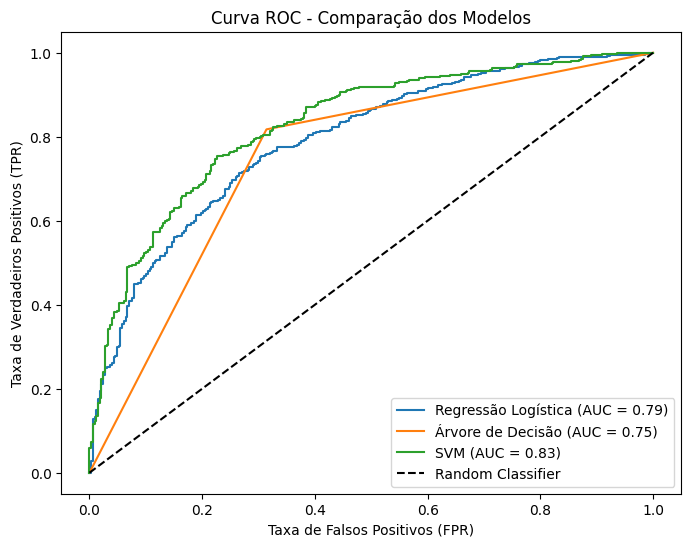

In [15]:
# Criar a figura da Curva ROC
plt.figure(figsize=(8, 6))

# Plot das curvas ROC
plt.plot(fpr_log, tpr_log, label=f"Regress√£o Log√≠stica (AUC = {auc_log:.2f})")
plt.plot(fpr_tree, tpr_tree, label=f"√Årvore de Decis√£o (AUC = {auc_tree:.2f})")
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc_svm:.2f})")

# Linha diagonal (random classifier)
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

# Configura√ß√µes do gr√°fico
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Curva ROC - Compara√ß√£o dos Modelos")
plt.legend()
plt.show()

## **Plot da Curva ROC para Compara√ß√£o**

### **An√°lise Comparativa dos Modelos - Curva ROC**

### **Regress√£o Log√≠stica (AUC = 0.79)**
- **Desempenho bom**, com uma **AUC de 0.79**, indicando uma boa separa√ß√£o entre classes.  
- O modelo apresenta **bom equil√≠brio entre precis√£o e recall**, mas **n√£o √© o melhor** da compara√ß√£o.  
- Pode ser mais adequado se for necess√°rio um **modelo simples e interpret√°vel**.  

---

### **√Årvore de Decis√£o (AUC = 0.75)**
- **Modelo mais simples e interpret√°vel**, √∫til para entender **crit√©rios de decis√£o**.  
- **A menor AUC (0.75)** entre os modelos indica que pode estar **superajustado** aos dados de treino ou n√£o generalizar bem.  
- A curva ROC **n√£o √© t√£o suave**, sugerindo que pode ser **sens√≠vel a outliers** e varia√ß√µes nos dados.  

---

### **SVM - M√°quinas de Vetores de Suporte (AUC = 0.83)**
- **Melhor desempenho geral** com **AUC de 0.83**, indicando a melhor separa√ß√£o entre classes.  
- O modelo **generaliza bem** e **tem uma curva ROC mais suave**, o que sugere melhor estabilidade.  
- **Pode ser mais lento** para grandes volumes de dados devido ao **alto custo computacional**.  

---

## **Conclus√£o: Melhor Modelo**
- **SVM √© a melhor escolha** para este problema, pois obteve a **maior AUC (0.83)**, sugerindo que tem **maior capacidade de distinguir os vinhos bons dos ruins**.  
- No entanto, se o tempo de execu√ß√£o for um fator importante, a **Regress√£o Log√≠stica** pode ser uma alternativa vi√°vel.  


---

## **Etapa 6 - Infer√™ncia com Vinhos Tintos**

- Aplicar **o modelo escolhido** para prever a qualidade dos **vinhos tintos**.
- **N√£o treinar novamente!** Utilizar apenas os pesos do modelo treinado.
- Determinar **quantos vinhos s√£o bons ou ruins**.
- Comparar o desempenho **entre vinhos brancos e tintos**.
- Responder: **O modelo funciona da mesma forma para essa nova base?** Justificar.

In [18]:
# Remover colunas desnecess√°rias (incluindo 'opinion')
df_red = df_red.drop(columns=["quality", "type", "opinion"], errors="ignore")

# Garantir que as colunas de X_red estejam na mesma ordem de X_train
df_red = df_red[X.columns]  # Reordenando as colunas para garantir consist√™ncia

# Aplicar a mesma padroniza√ß√£o usada nos vinhos brancos
X_red_scaled = scaler.transform(df_red)

print("‚úÖ Vinhos tintos preparados para infer√™ncia!")


‚úÖ Vinhos tintos preparados para infer√™ncia!


In [19]:
# Fazer previs√µes usando o modelo j√° treinado
y_pred_red = modelo_svm.predict(X_red_scaled)

# Adicionar as previs√µes ao DataFrame
df_red["predicted_opinion"] = y_pred_red

# Contar quantos vinhos foram classificados como bons (1) e ruins (0)
wine_counts = df_red["predicted_opinion"].value_counts()

# Exibir os resultados
print("üîπ Classifica√ß√£o dos Vinhos Tintos:")
print(f"Vinhos Bons (opinion = 1): {wine_counts.get(1, 0)}")
print(f"Vinhos Ruins (opinion = 0): {wine_counts.get(0, 0)}")


üîπ Classifica√ß√£o dos Vinhos Tintos:
Vinhos Bons (opinion = 1): 130
Vinhos Ruins (opinion = 0): 1469


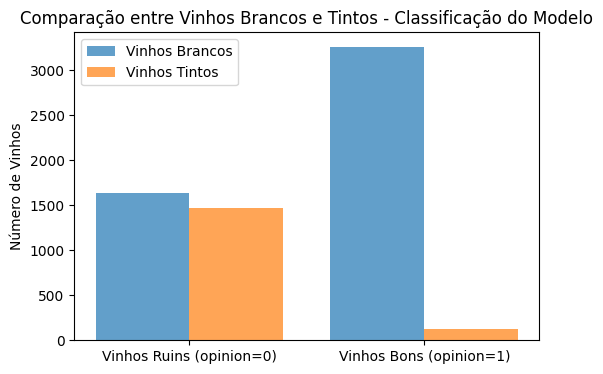

In [21]:
import matplotlib.pyplot as plt

# Contagem de vinhos brancos bons e ruins
white_counts = df_white["opinion"].value_counts()

# Criar gr√°fico comparativo
labels = ["Vinhos Ruins (opinion=0)", "Vinhos Bons (opinion=1)"]
white_values = [white_counts.get(0, 0), white_counts.get(1, 0)]
red_values = [wine_counts.get(0, 0), wine_counts.get(1, 0)]

x = range(len(labels))

plt.figure(figsize=(6,4))
plt.bar(x, white_values, width=0.4, label="Vinhos Brancos", alpha=0.7)
plt.bar([i + 0.4 for i in x], red_values, width=0.4, label="Vinhos Tintos", alpha=0.7)

plt.xticks([i + 0.2 for i in x], labels)
plt.ylabel("N√∫mero de Vinhos")
plt.title("Compara√ß√£o entre Vinhos Brancos e Tintos - Classifica√ß√£o do Modelo")
plt.legend()
plt.show()

---
## **Etapa 6 - Infer√™ncia com Vinhos Tintos**

### **Resumo dos Resultados**
- **Vinhos Brancos**:
  - Vinhos Ruins (opinion = 0): **~1.600**
  - Vinhos Bons (opinion = 1): **~3.200**
  
- **Vinhos Tintos**:
  - Vinhos Ruins (opinion = 0): **1.469**
  - Vinhos Bons (opinion = 1): **130**

---

## **Minha An√°lise dos Resultados**
Ao aplicar o modelo treinado com vinhos brancos para classificar os vinhos tintos, observei que **a grande maioria dos vinhos tintos foi classificada como ruim**. Isso contrasta com os vinhos brancos, onde houve uma propor√ß√£o significativamente maior de vinhos bons.  

Essa diferen√ßa sugere que o modelo **n√£o generalizou bem para os vinhos tintos**. Como esses dois tipos de vinho podem ter **caracter√≠sticas qu√≠micas distintas**, √© poss√≠vel que o modelo tenha aprendido padr√µes espec√≠ficos dos vinhos brancos, o que pode ter impactado seu desempenho na nova base.

---

## **O modelo funciona da mesma forma para os vinhos tintos?**
**N√£o exatamente**. Embora o modelo tenha sido capaz de fazer previs√µes para os vinhos tintos, a distribui√ß√£o das classifica√ß√µes sugere que ele pode **estar enviesado** para os padr√µes dos vinhos brancos.  

Isso indica que **o modelo treinado apenas com vinhos brancos n√£o √© a melhor op√ß√£o para classificar vinhos tintos**, pois ele pode n√£o estar considerando adequadamente as diferen√ßas entre os dois tipos de vinho.  

---

## **Sugest√£o de melhorias**
Para melhorar o desempenho do modelo e torn√°-lo mais confi√°vel para ambos os tipos de vinho, sugiro algumas abordagens:  

- **Treinar um novo modelo utilizando ambas as bases** (vinhos brancos e tintos) para garantir melhor generaliza√ß√£o.  
- **Analisar as diferen√ßas qu√≠micas entre os vinhos tintos e brancos** para entender melhor como essas vari√°veis influenciam na classifica√ß√£o.  
- **Testar novos algoritmos ou ajustar os hiperpar√¢metros** do modelo para melhorar sua capacidade de generaliza√ß√£o.  

---

## **Conclus√£o**
Os resultados mostram que o modelo treinado com vinhos brancos **n√£o conseguiu generalizar bem para os vinhos tintos**, pois classificou uma quantidade muito pequena de vinhos tintos como bons.  

Para obter um modelo mais eficiente e preciso, acredito que **o ideal seria treinar o modelo com ambas as bases de vinho**. Dessa forma, ele poderia aprender as caracter√≠sticas de cada tipo e melhorar suas previs√µes.  

**Projeto finalizado!**

---

## **Etapa 7 - Disponibiliza√ß√£o do C√≥digo**

- Subir todos os c√≥digos no **GitHub** e fornecer o link do reposit√≥rio.
- O reposit√≥rio deve conter o c√≥digo referente √†s **quest√µes 2-6**.

## **Entrega Final**

Ap√≥s finalizar todas as etapas:
1. **Salvar o trabalho em PDF**.
2. **Postar no Moodle** com o seguinte formato de nome:
   ```bash
   nomedoaluno_nomedadisciplina_pd.PDF